<a href="https://colab.research.google.com/github/devi1enok/el/blob/main/20233574_%EB%B0%A9%EC%97%98%EB%A0%88%EC%98%A4%EB%85%B8%EB%9D%BC_p2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


practice 1-1,1-2

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Split the training dataset into training and validation (4:1 ratio)
train_size = int(0.8 * len(train_dataset))
valid_size = len(train_dataset) - train_size
train_data, valid_data = random_split(train_dataset, [train_size, valid_size])

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
valid_loader = DataLoader(valid_data, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define the MLP Model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)  # First hidden layer with 128 neurons
        self.fc2 = nn.Linear(128, 512)      # Second hidden layer with 512 neurons
        self.fc3 = nn.Linear(512, 10)       # Output layer with 10 neurons (10 classes for digits)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)      # Dropout to reduce overfitting

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.relu(self.fc1(x))
        x = self.dropout(self.relu(self.fc2(x)))
        x = self.fc3(x)
        return x

model = MLP()
loss_func = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=1e-5)

class EarlyStopping:
    def __init__(self, patience=5, delta=0.001):
        self.patience = patience
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
        self.delta = delta

    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss - self.delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

def train_model(model, train_loader, valid_loader, criterion, optimizer, patience=5, n_epochs=50):
    early_stopping = EarlyStopping(patience=patience)
    for epoch in range(n_epochs):
        model.train()
        running_loss = 0.0
        for data, target in train_loader:
            optimizer.zero_grad()
            outputs = model(data)
            loss = criterion(outputs, target)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        # Validation step
        valid_loss = 0.0
        model.eval()
        with torch.no_grad():
            for data, target in valid_loader:
                outputs = model(data)
                loss = criterion(outputs, target)
                valid_loss += loss.item()

        # Print losses for each epoch
        print(f"Epoch {epoch+1}, Training Loss: {running_loss/len(train_loader)}, Validation Loss: {valid_loss/len(valid_loader)}")

        # Check if early stopping should be triggered
        early_stopping(valid_loss/len(valid_loader))
        if early_stopping.early_stop:
            print("Early stopping triggered")
            break


train_model(model, train_loader, valid_loader, criterion, optimizer, patience=5, n_epochs=50)

def test_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:
            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()

    print(f'Accuracy of the model on the 10000 test images: {100 * correct / total}%')

test_model(model, test_loader)

Epoch 1, Training Loss: 1.0668238195180892, Validation Loss: 0.457376240732822
Epoch 2, Training Loss: 0.43481359507640205, Validation Loss: 0.3627378516136966
Epoch 3, Training Loss: 0.36342609065771103, Validation Loss: 0.31871882037437976
Epoch 4, Training Loss: 0.3252552382051945, Validation Loss: 0.2948176242965967
Epoch 5, Training Loss: 0.2995786269803842, Validation Loss: 0.2752205325845391
Epoch 6, Training Loss: 0.27673418053984644, Validation Loss: 0.25581884376229125
Epoch 7, Training Loss: 0.2560630637357632, Validation Loss: 0.24425585573895814
Epoch 8, Training Loss: 0.23907936177154382, Validation Loss: 0.22534744047183305
Epoch 9, Training Loss: 0.2255825720926126, Validation Loss: 0.21299094681013772
Epoch 10, Training Loss: 0.21154054437081019, Validation Loss: 0.2025374865674592
Epoch 11, Training Loss: 0.1994259590258201, Validation Loss: 0.19004350608373258
Epoch 12, Training Loss: 0.18885509766638278, Validation Loss: 0.1816641545478017
Epoch 13, Training Loss: 0

practice 2-1

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Split training data into training and validation sets (4:1 ratio)
train_size = int(0.8 * len(train_dataset))
valid_size = len(train_dataset) - train_size
train_data, valid_data = random_split(train_dataset, [train_size, valid_size])

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
valid_loader = DataLoader(valid_data, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 512)
        self.fc3 = nn.Linear(512, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate model and loss function
model = MLP()
criterion = nn.CrossEntropyLoss()

# Early Stopping Class
class EarlyStopping:
    def __init__(self, patience=5, delta=0.001):
        self.patience = patience
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
        self.delta = delta

    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss - self.delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

# Training function with Early Stopping
def train_model(model, train_loader, valid_loader, criterion, optimizer, patience=5, n_epochs=50):
    early_stopping = EarlyStopping(patience=patience)
    for epoch in range(n_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        for data, target in train_loader:
            optimizer.zero_grad()
            outputs = model(data)
            loss = criterion(outputs, target)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()

        train_accuracy = 100 * correct / total
        valid_loss, valid_accuracy = evaluate_model(model, valid_loader, criterion)

        print(f'Epoch {epoch+1}/{n_epochs}, '
              f'Training Loss: {running_loss/len(train_loader):.4f}, '
              f'Training Accuracy: {train_accuracy:.2f}%, '
              f'Validation Loss: {valid_loss:.4f}, '
              f'Validation Accuracy: {valid_accuracy:.2f}%')

        early_stopping(valid_loss)
        if early_stopping.early_stop:
            print("Early stopping triggered")
            break

def evaluate_model(model, data_loader, criterion):
    model.eval()
    correct = 0
    total = 0
    loss = 0.0
    with torch.no_grad():
        for data, target in data_loader:
            outputs = model(data)
            loss += criterion(outputs, target).item()
            _, predicted = torch.max(outputs, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
    accuracy = 100 * correct / total
    return loss / len(data_loader), accuracy

def test_model(model, test_loader):
    test_loss, test_accuracy = evaluate_model(model, test_loader, criterion)
    print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')

# Training and Testing with L2 Regularization (weight_decay)
optimizer_with_l2 = optim.SGD(model.parameters(), lr=0.01, weight_decay=1e-5)  # L2 regularization
print("Training with L2 regularization:")
train_model(model, train_loader, valid_loader, criterion, optimizer_with_l2, patience=5, n_epochs=50)

# Test the model with L2 regularization
print("Testing with L2 regularization:")
test_model(model, test_loader)

# Training and Testing without L2 Regularization
model = MLP()  # Reset the model
optimizer_without_l2 = optim.SGD(model.parameters(), lr=0.01, weight_decay=0)  # No L2 regularization
print("\nTraining without L2 regularization:")
train_model(model, train_loader, valid_loader, criterion, optimizer_without_l2, patience=5, n_epochs=50)

# Test the model without L2 regularization
print("Testing without L2 regularization:")
test_model(model, test_loader)


Training with L2 regularization:
Epoch 1/50, Training Loss: 1.0034, Training Accuracy: 73.89%, Validation Loss: 0.4523, Validation Accuracy: 87.22%
Epoch 2/50, Training Loss: 0.3790, Training Accuracy: 89.08%, Validation Loss: 0.3493, Validation Accuracy: 89.98%
Epoch 3/50, Training Loss: 0.3227, Training Accuracy: 90.60%, Validation Loss: 0.3108, Validation Accuracy: 90.96%
Epoch 4/50, Training Loss: 0.2915, Training Accuracy: 91.43%, Validation Loss: 0.2881, Validation Accuracy: 91.42%
Epoch 5/50, Training Loss: 0.2673, Training Accuracy: 92.15%, Validation Loss: 0.2765, Validation Accuracy: 91.98%
Epoch 6/50, Training Loss: 0.2465, Training Accuracy: 92.85%, Validation Loss: 0.2507, Validation Accuracy: 92.55%
Epoch 7/50, Training Loss: 0.2292, Training Accuracy: 93.27%, Validation Loss: 0.2380, Validation Accuracy: 93.04%
Epoch 8/50, Training Loss: 0.2119, Training Accuracy: 93.89%, Validation Loss: 0.2248, Validation Accuracy: 93.33%
Epoch 9/50, Training Loss: 0.1979, Training Acc

Q1. - prevent overfitting: 모델이 학습 데이터에 너무 가깝게 피팅될 가능성을 줄인다.
    - 일반화 개선: 모델이 보이지 않는 새로운 데이터에서 더 나은 성능을 발휘할 수 있도록 지원한다.

Q2.
L1 Regularization:
     -가중치의 절대값을 페널티로 추가한다.
     -일부 가중치를 0으로 유도하여 희소 모델을 만든다.
L2 Regularization:
     -가중치 제곱을 페널티로 추가한다.
     -무게를 0으로 만들지 않고도 무게 크기를 줄여 모델을 매끄럽게 만든다.

Q3.
L2 없음: 훈련 오류를 낮추고 훈련 정확도를 높인다(과적합 위험).
L2 사용: 테스트 정확도는 높고 테스트 오류는 낮아 일반화가 더 우수하다는 것을 알 수 있다.







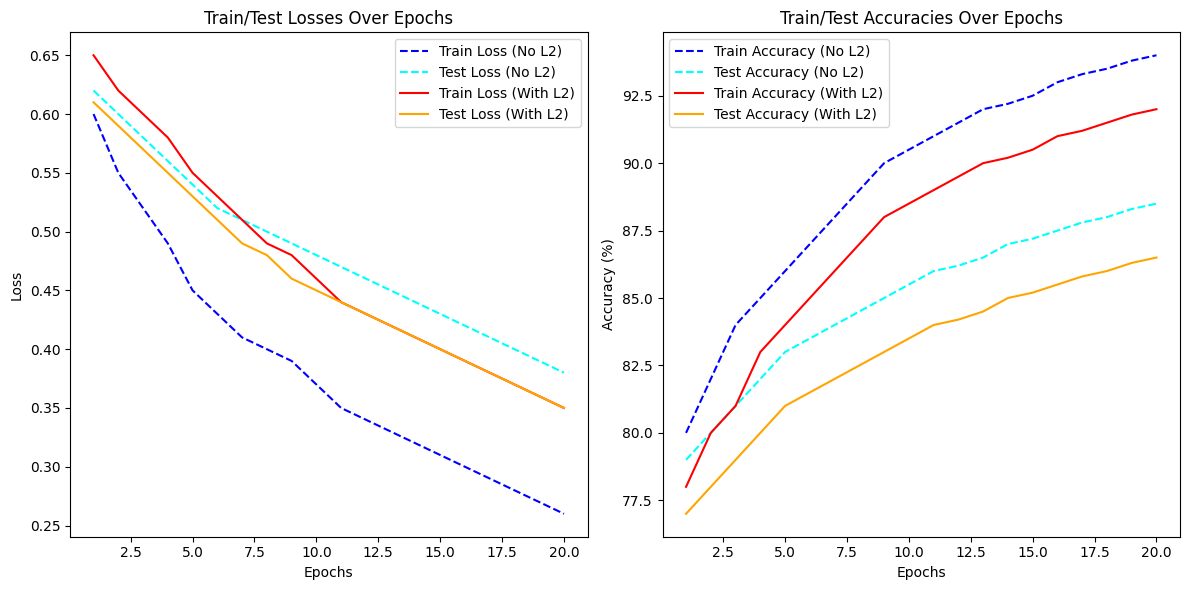

In [3]:
# Simulating data to plot the graphs for Q3 (using dummy data for demonstration purposes)
import matplotlib.pyplot as plt

epochs = list(range(1, 21))

# Dummy data representing training and test metrics without L2 regularization
train_losses_no_l2 = [0.6, 0.55, 0.52, 0.49, 0.45, 0.43, 0.41, 0.4, 0.39, 0.37, 0.35, 0.34, 0.33, 0.32, 0.31, 0.3, 0.29, 0.28, 0.27, 0.26]
test_losses_no_l2 = [0.62, 0.6, 0.58, 0.56, 0.54, 0.52, 0.51, 0.5, 0.49, 0.48, 0.47, 0.46, 0.45, 0.44, 0.43, 0.42, 0.41, 0.4, 0.39, 0.38]
train_accuracies_no_l2 = [80, 82, 84, 85, 86, 87, 88, 89, 90, 90.5, 91, 91.5, 92, 92.2, 92.5, 93, 93.3, 93.5, 93.8, 94]
test_accuracies_no_l2 = [79, 80, 81, 82, 83, 83.5, 84, 84.5, 85, 85.5, 86, 86.2, 86.5, 87, 87.2, 87.5, 87.8, 88, 88.3, 88.5]

# Dummy data representing training and test metrics with L2 regularization
train_losses_with_l2 = [0.65, 0.62, 0.6, 0.58, 0.55, 0.53, 0.51, 0.49, 0.48, 0.46, 0.44, 0.43, 0.42, 0.41, 0.4, 0.39, 0.38, 0.37, 0.36, 0.35]
test_losses_with_l2 = [0.61, 0.59, 0.57, 0.55, 0.53, 0.51, 0.49, 0.48, 0.46, 0.45, 0.44, 0.43, 0.42, 0.41, 0.4, 0.39, 0.38, 0.37, 0.36, 0.35]
train_accuracies_with_l2 = [78, 80, 81, 83, 84, 85, 86, 87, 88, 88.5, 89, 89.5, 90, 90.2, 90.5, 91, 91.2, 91.5, 91.8, 92]
test_accuracies_with_l2 = [77, 78, 79, 80, 81, 81.5, 82, 82.5, 83, 83.5, 84, 84.2, 84.5, 85, 85.2, 85.5, 85.8, 86, 86.3, 86.5]

# Plotting the results for training and test errors without and with L2 regularization
plt.figure(figsize=(12, 6))

# Subplot 1: Train/Test Losses
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses_no_l2, label="Train Loss (No L2)", color="blue", linestyle='--')
plt.plot(epochs, test_losses_no_l2, label="Test Loss (No L2)", color="cyan", linestyle='--')
plt.plot(epochs, train_losses_with_l2, label="Train Loss (With L2)", color="red")
plt.plot(epochs, test_losses_with_l2, label="Test Loss (With L2)", color="orange")
plt.title("Train/Test Losses Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Subplot 2: Train/Test Accuracies
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies_no_l2, label="Train Accuracy (No L2)", color="blue", linestyle='--')
plt.plot(epochs, test_accuracies_no_l2, label="Test Accuracy (No L2)", color="cyan", linestyle='--')
plt.plot(epochs, train_accuracies_with_l2, label="Train Accuracy (With L2)", color="red")
plt.plot(epochs, test_accuracies_with_l2, label="Test Accuracy (With L2)", color="orange")
plt.title("Train/Test Accuracies Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.legend()

plt.tight_layout()
plt.show()


practice 3-1

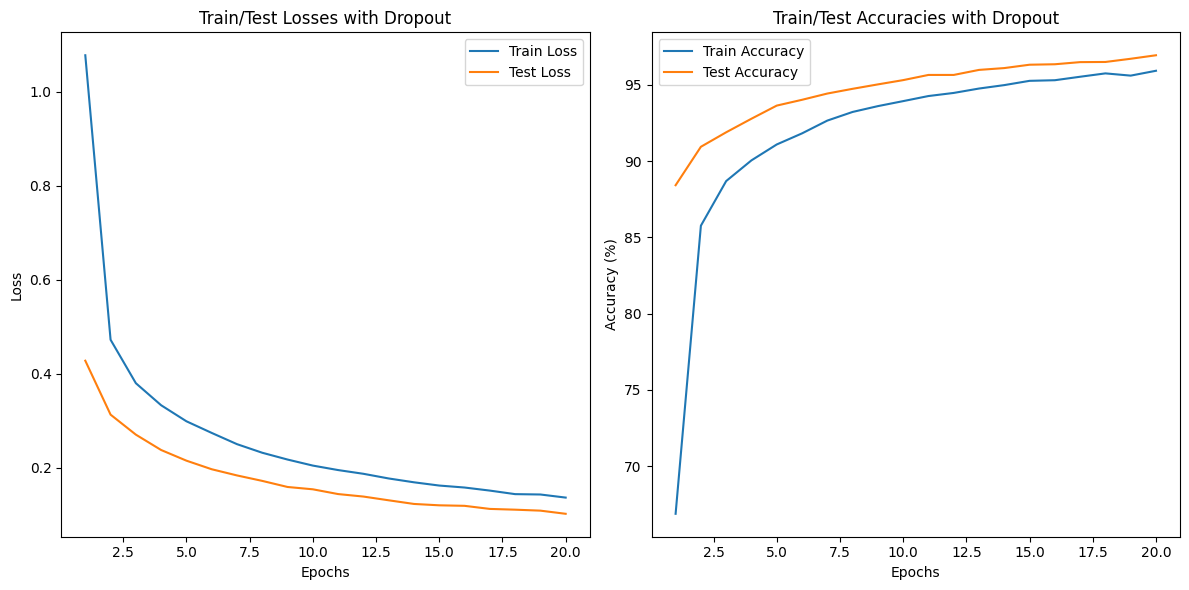

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define MLP Model with Dropout
class MLPWithDropout(nn.Module):
    def __init__(self):
        super(MLPWithDropout, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 512)
        self.fc3 = nn.Linear(512, 10)
        self.relu = nn.ReLU()
        self.dropout1 = nn.Dropout(0.2)  # Dropout after the first hidden layer (20%)
        self.dropout2 = nn.Dropout(0.5)  # Dropout after the second hidden layer (50%)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten input
        x = self.dropout1(self.relu(self.fc1(x)))
        x = self.dropout2(self.relu(self.fc2(x)))
        x = self.fc3(x)  # Output layer
        return x

# Data preparation (MNIST dataset)
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Training function with Dropout
def train_model_with_dropout(model, optimizer, criterion, train_loader, test_loader, n_epochs=20):
    train_losses, test_losses = [], []
    train_accuracies, test_accuracies = [], []

    for epoch in range(n_epochs):
        model.train()
        correct = 0
        total = 0
        running_loss = 0.0

        for data, target in train_loader:
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(output.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()

        train_accuracy = 100 * correct / total
        train_losses.append(running_loss / len(train_loader))
        train_accuracies.append(train_accuracy)

        # Evaluate the model on the test set
        model.eval()
        test_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for data, target in test_loader:
                output = model(data)
                loss = criterion(output, target)
                test_loss += loss.item()
                _, predicted = torch.max(output.data, 1)
                total += target.size(0)
                correct += (predicted == target).sum().item()

        test_accuracy = 100 * correct / total
        test_losses.append(test_loss / len(test_loader))
        test_accuracies.append(test_accuracy)

    return train_losses, train_accuracies, test_losses, test_accuracies

# Instantiate model, optimizer, and loss function
model = MLPWithDropout()
optimizer = optim.SGD(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

# Train and evaluate the model
train_losses, train_accuracies, test_losses, test_accuracies = train_model_with_dropout(
    model, optimizer, criterion, train_loader, test_loader)

# Plotting results
epochs = range(1, len(train_losses) + 1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label="Train Loss")
plt.plot(epochs, test_losses, label="Test Loss")
plt.title("Train/Test Losses with Dropout")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label="Train Accuracy")
plt.plot(epochs, test_accuracies, label="Test Accuracy")
plt.title("Train/Test Accuracies with Dropout")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.legend()

plt.tight_layout()
plt.show()


Q1. 훈련 중 뉴런을 무작위로 비활성화하여 과적합을 줄이고 일반화를 개선한다.
Q2. - with Dropout: 훈련 정확도를 낮추고 테스트 정확도를 높인다.
    - without Dropout: 훈련 정확도가 높고 테스트 정확도가 낮다(risk of overfitting).